Import Library

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import Optional

# Load data
Use datasets fashion_mnist from Tensorflow


Link:
[fashion_mnist from Tensorflow](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=vi)


In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist. load_data()

Map from numeric labels (0–9) in Fashion MNIST dataset to corresponding clothing category names

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)

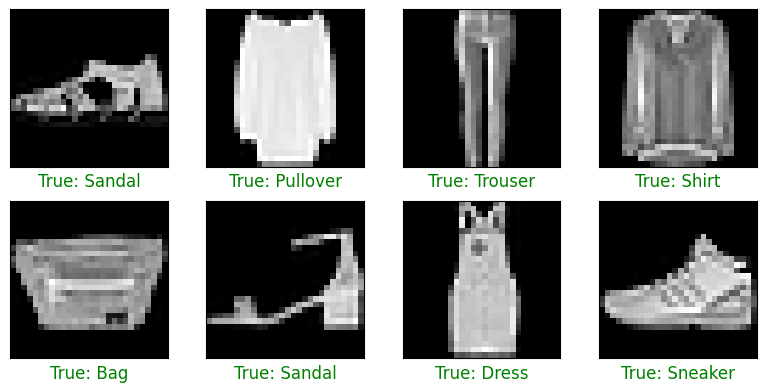

In [4]:
def plot_data (x_data: np.ndarray, y_data: np.ndarray) -> None:
    
    nrows, ncols = 2, 4
    fig, axes = plt.subplots (nrows, ncols, figsize = (8, 4))
    length_x = x_data.shape[0]
    
    for index in range (nrows * ncols):
        ax = axes [index // ncols, index % ncols]
        
        img_index = random.randint (0, length_x)
        ax.imshow (x_data[img_index], cmap = 'gray')
        ax.set (xticks = [], yticks = [])
        
        true_label = f"True: {class_names[y_data [img_index]]}"
        ax.set_xlabel(true_label, color = 'green', fontsize = 12)
    plt.tight_layout()
    plt.show()

plot_data (X_train, Y_train)

# Data_preprocessing

***1. Convert X_train to float32 and normalize pixel values from [0, 255] to [0, 1].***

In [5]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

**Explanation:**

- astype(np.float32) → converts the data type to 32-bit floating point for faster computation and TensorFlow compatibility.

- / 255 → scales pixel values from the original 0–255 range to a 0–1 range, which helps the model train more efficiently.

**Check type:**

In [6]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

***2. Add a new dimension at the end (axis = -1) to match the expected input shape for the model.***


This is often used to convert grayscale images from shape (height, width) to (height, width, 1)

In [7]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

**Check shape**

In [8]:
X_train.shape, X_train.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

***3. Convert class labels (integers) into one-hot encoded vectors.***

This makes the labels compatible with classification models that use softmax activation and categorical crossentropy loss.

In [9]:
Y_train_label = keras.utils.to_categorical(Y_train, class_nums)
Y_test_label = keras.utils.to_categorical(Y_test, class_nums)

# Network (ANN) Architecture

***1. Build a Sequential model.***

In [36]:
input_shape = (28, 28, 1)

model = keras.models.Sequential([
    
    # Flatten the 2D image into a 1D vector to feed into Dense layers
    layers.Flatten(input_shape = input_shape),

    # Fully connected layer with 512 neurons
    # ReLU activation helps model learn non-linear patterns and reduces vanishing gradient issues
    layers.Dense(512, activation = 'relu'),

    # Fully connected layer with 256 neurons for further feature extraction
    layers.Dense(256, activation = 'relu'),

    # Output layer: number of neurons = number of classes (10)
    # Softmax converts outputs into probability distribution
    layers.Dense(class_nums, activation = 'softmax')  
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

***2. Compile the model.***

In [37]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Reasoning:**
- The 'rmsprop' optimizer is chosen because it is well-suited for training neural networks, especially when dealing with non-stationary objectives. It adaptively adjusts the learning rate for each parameter based on the moving average of recent gradients, which helps the model converge faster and more stably. 

- The 'categorical_crossentropy' loss function is appropriate for multi-class classification problems where labels are in one-hot encoded form, such as the fashion_mnist dataset with 10 clothing categories. It measures the divergence between the predicted probability distribution and the true distribution, guiding the network to improve its predictions.

- Finally, metrics=['accuracy'] is included to monitor the model’s classification accuracy during both training and evaluation, providing a clear indicator of performance improvement over epochs.

***3. Train model.***

In [38]:
epochs = 10 # Reason: For fashion_mnist, 10 epochs are enough to reach high accuracy without overfitting.
batch_size = 256 
# Reason: Initial trials with batch_size=128 gave slower training and less stable accuracy.
# Increasing to 256:
#   - Better utilization of GPU/CPU parallel processing → faster training.
#   - Fewer weight updates per epoch -> more stable optimization.
#   - Memory usage stays reasonable, not exceeding hardware limits.

history = model.fit(X_train, Y_train_label,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.1)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7721 - loss: 0.6326 - val_accuracy: 0.8088 - val_loss: 0.5104
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8448 - loss: 0.4155 - val_accuracy: 0.8527 - val_loss: 0.3978
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8653 - loss: 0.3608 - val_accuracy: 0.8722 - val_loss: 0.3455
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8767 - loss: 0.3292 - val_accuracy: 0.8747 - val_loss: 0.3463
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8854 - loss: 0.3068 - val_accuracy: 0.8793 - val_loss: 0.3273
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8930 - loss: 0.2870 - val_accuracy: 0.8643 - val_loss: 0.3673
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8981 - loss: 0.2717 - val_accuracy: 0.8770 - val_loss: 0.3420
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9037 - loss: 0.2568 - val_accu

***4. Training and Validation Loss/Accuracy over Epochs.***

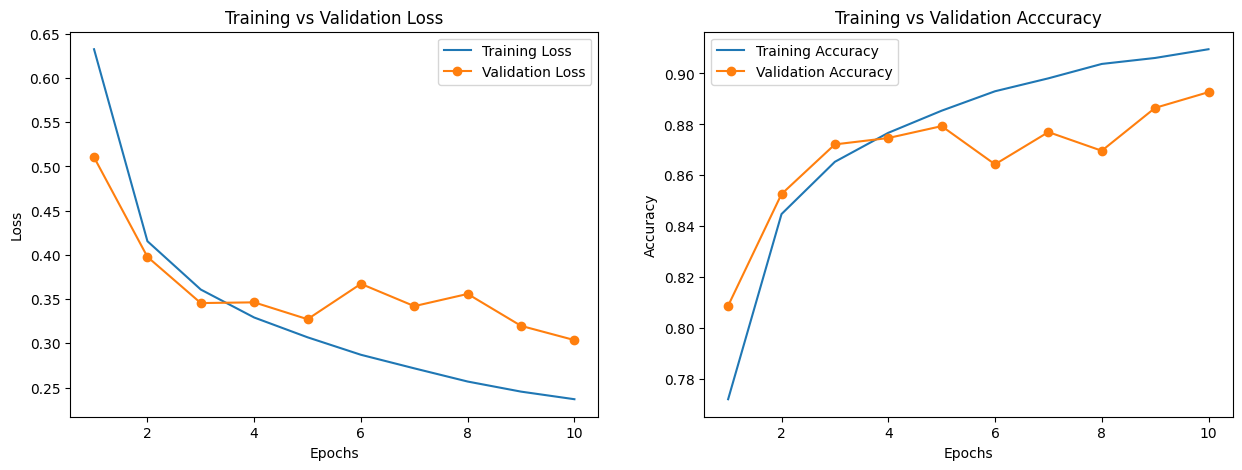

In [39]:
history_dict = history.history
history_dict.keys()

train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
epoch_runs = [i + 1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label = 'Training Loss')
ax1.plot(epoch_runs, val_loss, label = 'Validation Loss', marker = 'o')
ax1.set(title = 'Training vs Validation Loss', xlabel = 'Epochs', ylabel = 'Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = 'Training Accuracy')
ax2.plot(epoch_runs, val_acc, label = 'Validation Accuracy', marker = 'o')
ax2.set(title = 'Training vs Validation Acccuracy', xlabel = 'Epochs', ylabel = 'Accuracy')
ax2.legend()

plt.show()

# Model Evaluation

In [41]:
score = model.evaluate(X_test, Y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8910 - loss: 0.3177


# Prediction

In [48]:
y_proba = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


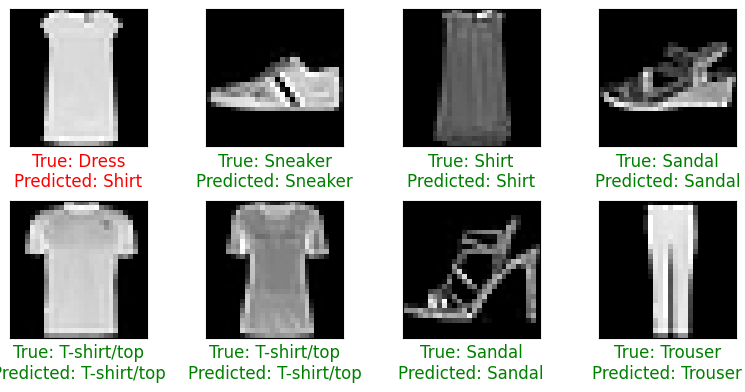

In [50]:
def plot_data_predict(x_data: np.ndarray, 
              y_data: np.ndarray, 
              y_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = x_data.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        # Randomly select an image
        img_idx = random.randint(0, len_x)

        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color = 'green'
        true_label_str = f"True: {class_names[y_data[img_idx]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            # Red if prediction is wrong
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPredicted: {predicted_label}"

        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()

plot_data_predict(X_test, Y_test, y_proba)

In [53]:
model.save('fashion_mnist_model.keras')

In [ ]:
# Load model
from tensorflow.keras.models import load_model
model = load_model('fashion_mnist_model.keras')